In [ ]:
# add google drive as an accessible path 
from google.colab import drive
drive.mount('/content/drive')

# change path to the designated google drive folder
# otherwise, data will be saved in /content folder which you may have issue locating
%cd /content/drive/My Drive/CSSinsta/

Mounted at /content/drive
/content/drive/My Drive/CSSinsta


In [ ]:
%cd /content/drive/My Drive/CSSinsta/


/content/drive/My Drive/CSSinsta


In [ ]:
import pandas as pd

df = pd.read_excel('2018tweets.xlsx')

In [ ]:
df.shape

(7559, 2)

In [ ]:
df['text']=df['tweet']
df.drop(['tweet'],axis=1,inplace=True)

In [ ]:
list_of_text = []
for i in df['text']:
    i = str(i)
    list_of_text.append(i)
df["text"] = list_of_text
df

Unnamed: 0                                               text
0          94714  Pork Thai Boat Noodle ($2.80) from Saap Lah Th...
1          94717  With Dawson at Table Mountain National Park [p...
2          94718  Yaya 😢 (@ KPJ Johor Specialist Hospital in Joh...
3          94719  Why  do we close our eyes    When we pray???wh...
4          94720  This little guy is in Florida for a few days a...
...          ...                                                ...
7554      105709  Gas inspection (@ Blk 59 Circuit Road)  https:...
7555      105710  I'm at Baby Dragon Playground in Singapore  ht...
7556      105711  Bowling JM Team . @ Lite SuperBowl JB  https:/...
7557      105712  Soundcheck for tonight’s show! 😚👌🏼 See? I’ve m...
7558      105713  I'm at Pasir Ris MRT Station (EW1) - @smrt_sin...

[7559 rows x 2 columns]

In [ ]:
import re
df['text'] = df.text
import string

df.text = df.text.str.replace(r'http ...', r'')
df.text = df.text.str.replace(r'http(\S)+', r'')
df.text = df.text.str.replace(r'(RT|rt)[ ]*@[ ]*[\S]+',r'')
df.text = df.text.str.replace(r'@[\S]+',r'')

# Remove non-ascii words or characters
df.text = [''.join([i if ord(i) < 128 else '' for i in text]) for text in df.text]
df.text = df.text.str.replace(r'_[\S]?',r'')

# Remove extra space
df.text = df.text.str.replace(r'[ ]{2, }',r' ')

# Remove &, < and >
df.text = df.text.str.replace(r'&amp;?',r'and')
df.text = df.text.str.replace(r'&lt;',r'<')
df.text = df.text.str.replace(r'&gt;',r'>')

# df.text = re.sub('[%s]' % re.escape(string.punctuation), '', df.text) 
# df.text = re.sub('\w*\d\w*', '', text)

# Insert space between words and punctuation marks
df.text = df.text.str.replace(r'([\w\d]+)([^\w\d ]+)', r'\1 \2')
df.text = df.text.str.replace(r'([^\w\d ]+)([\w\d]+)', r'\1 \2')

# Lowercased and strip
df.text = df.text.str.lower()
df.text = df.text.str.strip()



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import defaultdict
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()
import operator
!pip install emoji
import emoji
# Defining stop, which contains all English stopwards
stop = stopwords.words('english')

# Function clean_text_round2 to remove stop words in the tweets
def clean_text_round2(text):
    return ' '.join([word for word in text.split() if word not in (stop)])

def clean_text_round3(text): 
    tokenization = nltk.word_tokenize(text)
    lemmtized_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in tokenization])
    return lemmtized_text

def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['text']= pd.DataFrame(df['text'].apply(clean_text_round2))
df['text']= pd.DataFrame(df['text'].apply(clean_text_round3))
df['text']= pd.DataFrame(df['text'].apply(give_emoji_free_text))
df

Unnamed: 0                                               text
0          94714  pork thai boat noodle ( $ 2 . 80 ) saap lah th...
1          94717        dawson table mountain national park [ pic ]
2          94718  yaya ( @ kpj johor specialist hospital johor b...
3          94719    close eye pray ? ? ? cry ? ? ? dream kiss ? ? ?
4          94720  little guy florida day way quiet around house ...
...          ...                                                ...
7554      105709           gas inspection ( @ blk 59 circuit road )
7555      105710                 ' baby dragon playground singapore
7556      105711              bowling jm team . @ lite superbowl jb
7557      105712  soundcheck tonight show ! see ? ive foot masse...
7558      105713         ' pasir ri mrt station ( ew1 ) - singapore

[7559 rows x 2 columns]

In [ ]:
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Storing the scores in list of dictionaries
scores = []

# Declare variables for different scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Iterating through the tweets and calculating the sentiment score of each tweet
for i in range(df['text'].shape[0]):

    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

# Appending the scores into the dataframe for further analysis 
twitter_sentiments_score = pd.DataFrame.from_dict(scores)


In [ ]:
df['score']=twitter_sentiments_score['comp_score']

In [ ]:
df

Unnamed: 0                                               text score
0          94714  pork thai boat noodle ( $ 2 . 80 ) saap lah th...   neu
1          94717        dawson table mountain national park [ pic ]   neu
2          94718  yaya ( @ kpj johor specialist hospital johor b...   neu
3          94719    close eye pray ? ? ? cry ? ? ? dream kiss ? ? ?   pos
4          94720  little guy florida day way quiet around house ...   neu
...          ...                                                ...   ...
7554      105709           gas inspection ( @ blk 59 circuit road )   neu
7555      105710                 ' baby dragon playground singapore   neu
7556      105711              bowling jm team . @ lite superbowl jb   neu
7557      105712  soundcheck tonight show ! see ? ive foot masse...   neu
7558      105713         ' pasir ri mrt station ( ew1 ) - singapore   neu

[7559 rows x 3 columns]

In [ ]:
df.to_excel('2018.xlsx')

In [ ]:

twitter_sentiments_score['comp_score'] = twitter_sentiments_score['Compound'].apply(lambda c: 'pos' if c >0  else('neu' if c==0 else 'neg'))
twitter_sentiments_score

Compound  Positive  Negative  Neutral comp_score
0       0.0000     0.000      0.00    1.000        neu
1       0.0000     0.000      0.00    1.000        neu
2       0.0000     0.000      0.00    1.000        neu
3       0.6072     0.364      0.14    0.496        pos
4       0.0000     0.000      0.00    1.000        neu
...        ...       ...       ...      ...        ...
7554    0.0000     0.000      0.00    1.000        neu
7555    0.0000     0.000      0.00    1.000        neu
7556    0.0000     0.000      0.00    1.000        neu
7557    0.0000     0.000      0.00    1.000        neu
7558    0.0000     0.000      0.00    1.000        neu

[7559 rows x 5 columns]

In [ ]:
twitter_sentiments_score['comp_score'] = twitter_sentiments_score['Compound'].apply(lambda c: 'pos' if c >0  else('neu' if c==0 else 'neg'))
print('pos')
print(twitter_sentiments_score['comp_score'].value_counts()['pos'])
print(twitter_sentiments_score['comp_score'].value_counts()['pos']/twitter_sentiments_score['comp_score'].count()*100)
print('neu')
print(twitter_sentiments_score['comp_score'].value_counts()['neu'])
print(twitter_sentiments_score['comp_score'].value_counts()['neu']/twitter_sentiments_score['comp_score'].count()*100)
print('neg')
print(twitter_sentiments_score['comp_score'].value_counts()['neg'])
print(twitter_sentiments_score['comp_score'].value_counts()['neg']/twitter_sentiments_score['comp_score'].count()*100)


# df["one"].apply(lambda x: x*10 if x<2 elif x<4 x**2 else x+10)
# lambda x: x*10 if x<2 else (x**2 if x<4 else x+10)

pos
993
32.47220405493787
neu
1606
52.51798561151079
neg
459
15.009810333551341


Text(0, 0.5, 'Tweets')

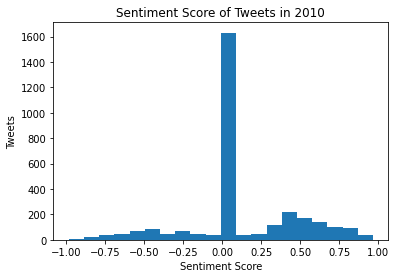

In [ ]:
# Plot a histogram to visualise the spread of the sentiment scores 
import matplotlib.pyplot as plt
plt.title('Sentiment Score of Tweets in 2010')
plt.hist(twitter_sentiments_score['Compound'], bins=20) 
plt.xlabel('Sentiment Score')
plt.ylabel('Tweets')